# Case Logistic Regression

In [0]:
!pip install -q Keras

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import to_categorical


Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
def plot_images(images, labels):
    fig, axes = plt.subplots(5,5)
    fig.subplots_adjust(hspace = 0.5,wspace = 0.5)
    
    for i,ax in zip(np.random.choice(range(images.shape[0]),25),axes.flat):
        ax.imshow(images[i].reshape(28,28),cmap='binary')
        ax.set_xlabel('label :{}'.format(labels[i]))
        ax.set_xticks([])
        ax.set_yticks([])

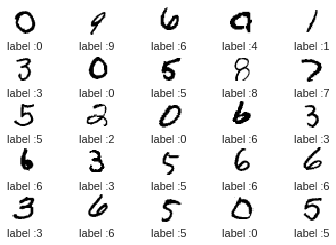

In [6]:
plot_images(X_train,y_train)

In [0]:
batch_size = 128
num_classes = 10
epochs = 30
img_rows, img_cols = 28, 28

## LR cannot take 2D input
Flatten the input image

In [8]:
X_train = X_train.reshape((-1, img_rows * img_cols))
X_test =  X_test.reshape((-1 , img_rows * img_cols))


# Scale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255


y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print('Train images : {}'.format(X_train.shape))
print('Test images : {}'.format(X_test.shape))
print('Train labels : {}'.format(y_train.shape))
print('Test labes : {}'.format(y_test.shape))

Train images : (60000, 784)
Test images : (10000, 784)
Train labels : (60000, 10)
Test labes : (10000, 10)


# Model

In [33]:
model = Sequential()
model.add(Dense(240, input_shape=(784,), activation='sigmoid'))
model.add(Dense(120, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))



# Compute loss and update
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.SGD(lr=0.5),
             metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 240)               188400    
_________________________________________________________________
dense_26 (Dense)             (None, 120)               28920     
_________________________________________________________________
dense_27 (Dense)             (None, 10)                1210      
Total params: 218,530
Trainable params: 218,530
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(X_train, y_train, 
          batch_size=batch_size, 
          epochs=epochs,
          verbose=1,)

Epoch 1/30
60000/60000 [==============================] - 3s 45us/step - loss: 0.7761 - acc: 0.7521
Epoch 2/30
60000/60000 [==============================] - 3s 45us/step - loss: 0.3208 - acc: 0.9059
Epoch 3/30
60000/60000 [==============================] - 3s 45us/step - loss: 0.2711 - acc: 0.9190
Epoch 4/30
60000/60000 [==============================] - 3s 45us/step - loss: 0.2331 - acc: 0.9321
Epoch 5/30
60000/60000 [==============================] - 3s 45us/step - loss: 0.2026 - acc: 0.9403
Epoch 6/30
44672/60000 [=====================>........] - ETA: 0s - loss: 0.1817 - acc: 0.9469

60000/60000 [==============================] - 3s 46us/step - loss: 0.1779 - acc: 0.9480
Epoch 7/30
60000/60000 [==============================] - 3s 45us/step - loss: 0.1589 - acc: 0.9533
Epoch 8/30
60000/60000 [==============================] - 3s 46us/step - loss: 0.1417 - acc: 0.9578
Epoch 9/30
60000/60000 [==============================] - 3s 45us/step - loss: 0.1282 - acc: 0.9624
Epoch 10/30
60000/60000 [==============================] - 3s 44us/step - loss: 0.1167 - acc: 0.9655
Epoch 11/30
56192/60000 [===========================>..] - ETA: 0s - loss: 0.1069 - acc: 0.9679

60000/60000 [==============================] - 3s 45us/step - loss: 0.1066 - acc: 0.9681
Epoch 12/30
60000/60000 [==============================] - 3s 44us/step - loss: 0.0972 - acc: 0.9710
Epoch 13/30
60000/60000 [==============================] - 3s 44us/step - loss: 0.0887 - acc: 0.9738
Epoch 14/30
60000/60000 [==============================] - 3s 45us/step - loss: 0.0816 - acc: 0.9760
Epoch 15/30
60000/60000 [==============================] - 3s 43us/step - loss: 0.0753 - acc: 0.9777
Epoch 16/30
60000/60000 [==============================] - 3s 44us/step - loss: 0.0698 - acc: 0.9797


Epoch 17/30
60000/60000 [==============================] - 3s 43us/step - loss: 0.0643 - acc: 0.9806
Epoch 18/30
60000/60000 [==============================] - 3s 44us/step - loss: 0.0598 - acc: 0.9821
Epoch 19/30
60000/60000 [==============================] - 3s 44us/step - loss: 0.0552 - acc: 0.9841
Epoch 20/30
60000/60000 [==============================] - 3s 44us/step - loss: 0.0516 - acc: 0.9849
Epoch 21/30
60000/60000 [==============================] - 3s 45us/step - loss: 0.0479 - acc: 0.9863
Epoch 22/30
43008/60000 [====================>.........] - ETA: 0s - loss: 0.0427 - acc: 0.9888

60000/60000 [==============================] - 3s 46us/step - loss: 0.0442 - acc: 0.9878
Epoch 23/30
60000/60000 [==============================] - 3s 46us/step - loss: 0.0414 - acc: 0.9884
Epoch 24/30
60000/60000 [==============================] - 3s 46us/step - loss: 0.0387 - acc: 0.9891
Epoch 25/30
60000/60000 [==============================] - 3s 45us/step - loss: 0.0354 - acc: 0.9899
Epoch 26/30
60000/60000 [==============================] - 3s 46us/step - loss: 0.0329 - acc: 0.9913
Epoch 27/30
54016/60000 [==========================>...] - ETA: 0s - loss: 0.0302 - acc: 0.9919

60000/60000 [==============================] - 3s 45us/step - loss: 0.0305 - acc: 0.9918
Epoch 28/30
60000/60000 [==============================] - 3s 45us/step - loss: 0.0281 - acc: 0.9926
Epoch 29/30
60000/60000 [==============================] - 3s 45us/step - loss: 0.0266 - acc: 0.9933
Epoch 30/30
60000/60000 [==============================] - 3s 45us/step - loss: 0.0249 - acc: 0.9939


In [35]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.066946212522313
Test accuracy: 0.9786
